# Tercera lista - Problema grupal 3

## Componentes del grupo

* Pol Casacuberta Gil
* Joaquin Faraone Prieto
* Agnès Felip i Díaz
* Marta Granero I Martí

## Aprendiendo a sumar

### Aprender a sumar dos números parece un problema fácil, pero es difícil enseñárselo a una máquina a partir de ejemplos. El objetivo de este problema es probar qué tan bueno es k-vecinos más cercanos aprendiendo esta tarea.

### Vamos a limitar la tarea a aprender a sumar dos números de tres dígitos, que pueden dar como resultado un número de cuatro dígitos como máximo. Esto se puede definir como un problema de clasificación de salida múltiple. Esto significa que el clasificador devuelve una predicción que corresponde a un conjunto de clases en lugar de una sola clase.

### Vamos a definir el problema como ejemplos que tienen seis atributos, los primeros tres atributos corresponden a los tres dígitos del primer número y los últimos tres a los dígitos del segundo número. La salida tiene cuatro valores, uno para cada dígito del número del resultado de la suma. Por ejemplo:

|X1|X2|X3|X4|X5|X6|Y1|Y2|Y3|Y4|
|--|--|--|--|--|--|--|--|--|--|
|0 |1 |6 |4 |7 |7 |0 |4 |9 |3 |


## Procedemos a realizar los ejercicios que se nos piden

In [49]:
import apafib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import  ConfusionMatrixDisplay,classification_report,\
                             RocCurveDisplay, PrecisionRecallDisplay,\
                             accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Binarizer
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display, HTML #core.display deprecated
show_html = lambda html: display(HTML(html))

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc

import random
import itertools
from itertools import permutations

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Definimos los atributos que tendran los datasets

In [50]:
columns      = ["X1", "X2", "X3", "X4", "X5", "X6", "Y1", "Y2", "Y3", "Y4"]
data_columns = ["X1", "X2", "X3", "X4", "X5", "X6"]
y_columns    = ["Y1", "Y2", "Y3", "Y4"]

#### a) La primera tarea es implementar una función que genera un conjunto de datos aleatorios de sumas de dos números de tres dígitos. Aseguraos de que no haya ejemplos repetidos en el conjunto de datos.

In [51]:
#Function to create array
def prepareArray(number, size):
    X1 = list(map(int, str(number)))
    while len(X1) < size:
        X1.insert(0,0)
    return X1
    
def setFormat(first,second):
    total = first+second
    X1 = prepareArray(first,3)
    X2 = prepareArray(second,3)
    Y  =  prepareArray(total,4)
    return X1+X2+Y

def createDataset(n, seed=42):
    np.random.seed(seed)
    firsts = np.random.randint(0, 999, size=n)
    seconds= np.random.randint(0, 999, size=n)
    matrix = []
    
    for first, second in zip(firsts,seconds):
        matrix.append(setFormat(first,second))

    data = pd.DataFrame(matrix, columns=columns)
    data = data.drop_duplicates()
    
    return data

def createDataset_p(n, seed=42):
    """
    This method makes absolutely sure that we create exactly n examples for the dataset, so that the datasets are strictly greater than each other.
    """
    max_number = 999
    np.random.seed(seed)
    random.seed(seed)
    values = np.linspace(0, max_number, 1000, dtype=int)
    unique_permutations = set(permutations(values, 2))
    # print(len(unique_permutations))
    # print(n)
    samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement
    matrix = []
    for sample in samples:
        matrix.append(setFormat(sample[0], sample[1]))
    data = pd.DataFrame(matrix, columns=columns)
    data = data.drop_duplicates()
    return data


#### b) Generad conjuntos de datos de tamaño creciente con no más del 20 % de los ejemplos posibles en este problema. Notad que hay $10^{6}$ ejemplos posibles. Dividid los conjuntos de datos en un conjunto de entrenamiento y test con una proporción de 90 %/10 %

### Generamos los 8 conjuntos de datos de tamaño creciente desde 25000 a 200000.

In [52]:
dataset0 = 25000
dataset1 = 50000
dataset2 = 75000
dataset3 = 100000
dataset4 = 125000
dataset5 = 150000
dataset6 = 175000
dataset7 = 200000

dataset0 = pd.DataFrame(createDataset_p(dataset0))
print(len(dataset0))
dataset1 = pd.DataFrame(createDataset_p(dataset1))
print(len(dataset1))
dataset2 = pd.DataFrame(createDataset_p(dataset2))
print(len(dataset2))
dataset3 = pd.DataFrame(createDataset_p(dataset3))
print(len(dataset3))
dataset4 = pd.DataFrame(createDataset_p(dataset4))
print(len(dataset4))
dataset5 = pd.DataFrame(createDataset_p(dataset5))
print(len(dataset5))
dataset6 = pd.DataFrame(createDataset_p(dataset6))
print(len(dataset6))
dataset7 = pd.DataFrame(createDataset_p(dataset7))
print(len(dataset7))


/tmp/ipykernel_31667/3287571617.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement


25000


/tmp/ipykernel_31667/3287571617.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement


50000


/tmp/ipykernel_31667/3287571617.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement


75000


/tmp/ipykernel_31667/3287571617.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement


100000


/tmp/ipykernel_31667/3287571617.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement


125000


/tmp/ipykernel_31667/3287571617.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement


150000


/tmp/ipykernel_31667/3287571617.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement


175000


/tmp/ipykernel_31667/3287571617.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(unique_permutations, k=n)  # picks k number of numbers from 0 to n without replacement


200000


### Dividimos los 8 conjuntos de datos, cada uno con un 90% de ejemplos en el conjunto de entrenamiento y 10% en el de test y obtenemos de cada dataset las matrices de datos de las etiquetas del conjunto de entrenamiento y las matrices de datos de las etiquetas del conjunto de test

In [53]:
X_train_0, X_test_0 = train_test_split(dataset0, test_size=0.1, random_state=42, shuffle=True)
X_train_1, X_test_1 = train_test_split(dataset1, test_size=0.1, random_state=42, shuffle=True)
X_train_2, X_test_2 = train_test_split(dataset2, test_size=0.1, random_state=42, shuffle=True)
X_train_3, X_test_3 = train_test_split(dataset3, test_size=0.1, random_state=42, shuffle=True)
X_train_4, X_test_4 = train_test_split(dataset4, test_size=0.1, random_state=42, shuffle=True)
X_train_5, X_test_5 = train_test_split(dataset5, test_size=0.1, random_state=42, shuffle=True)
X_train_6, X_test_6 = train_test_split(dataset6, test_size=0.1, random_state=42, shuffle=True)
X_train_7, X_test_7 = train_test_split(dataset7, test_size=0.1, random_state=42, shuffle=True)

y_train_0 = X_train_0[y_columns]
X_train_0 = X_train_0.drop(y_columns, axis=1)
y_test_0 = X_test_0[y_columns]
X_test_0 = X_test_0.drop(y_columns, axis=1)

y_train_1 = X_train_1[y_columns]
X_train_1 = X_train_1.drop(y_columns, axis=1)
y_test_1 = X_test_1[y_columns]
X_test_1 = X_test_1.drop(y_columns, axis=1)

y_train_2 = X_train_2[y_columns]
X_train_2 = X_train_2.drop(y_columns, axis=1)
y_test_2 = X_test_2[y_columns]
X_test_2 = X_test_2.drop(y_columns, axis=1)

y_train_3 = X_train_3[y_columns]
X_train_3 = X_train_3.drop(y_columns, axis=1)
y_test_3 = X_test_3[y_columns]
X_test_3 = X_test_3.drop(y_columns, axis=1)

y_train_4 = X_train_4[y_columns]
X_train_4 = X_train_4.drop(y_columns, axis=1)
y_test_4 = X_test_4[y_columns]
X_test_4 = X_test_4.drop(y_columns, axis=1)

y_train_5 = X_train_5[y_columns]
X_train_5 = X_train_5.drop(y_columns, axis=1)
y_test_5 = X_test_5[y_columns]
X_test_5 = X_test_5.drop(y_columns, axis=1)

y_train_6 = X_train_6[y_columns]
X_train_6 = X_train_6.drop(y_columns, axis=1)
y_test_6 = X_test_6[y_columns]
X_test_6 = X_test_6.drop(y_columns, axis=1)

y_train_7 = X_train_7[y_columns]
X_train_7 = X_train_7.drop(y_columns, axis=1)
y_test_7 = X_test_7[y_columns]
X_test_7 = X_test_7.drop(y_columns, axis=1)

#### c) Aplicad algún método de reducción de dimensionalidad a alguno de los conjuntos de datos de entrenamiento y comentad lo que se pueda apreciar en la visualización. Pensad en qué podéis representar sobre la transformación.

Aplicaremos el método de reducción sobre el dataset4

In [54]:
X_train_4.info(), X_test_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 100982 to 121958
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   X1      112500 non-null  int64
 1   X2      112500 non-null  int64
 2   X3      112500 non-null  int64
 3   X4      112500 non-null  int64
 4   X5      112500 non-null  int64
 5   X6      112500 non-null  int64
dtypes: int64(6)
memory usage: 6.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 118359 to 47967
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      12500 non-null  int64
 1   X2      12500 non-null  int64
 2   X3      12500 non-null  int64
 3   X4      12500 non-null  int64
 4   X5      12500 non-null  int64
 5   X6      12500 non-null  int64
dtypes: int64(6)
memory usage: 683.6 KB


(None, None)

In [55]:
X_train_4.describe(include='all')

,X1,X2,X3,X4,X5,X6
count,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000
mean,4.497182,4.506044,4.491200,4.517600,4.503858,4.488196
std,2.876121,2.871204,2.871603,2.870476,2.871765,2.869201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [56]:
X_train_standarized = X_train_4.copy()
scaler = StandardScaler()

X_train_standarized[data_columns] = scaler.fit_transform(X_train_4[data_columns])
X_train_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,112500.0,-5.996981e-17,1.000004,-1.563634,-0.868250,-0.172866,0.870210,1.565594
X2,112500.0,1.354137e-16,1.000004,-1.569399,-0.872824,0.172039,0.868613,1.565188
X3,112500.0,-3.637979e-17,1.000004,-1.564012,-0.867533,-0.171055,0.873662,1.570141
X4,112500.0,7.522279e-17,1.000004,-1.573823,-0.877071,0.168057,0.864808,1.561560
X5,112500.0,-1.329504e-16,1.000004,-1.568331,-0.871892,0.172766,0.869205,1.565644
X6,112500.0,1.566352e-17,1.000004,-1.564273,-0.867212,-0.170151,0.875441,1.572502


In [57]:
X_test_standarized = X_test_4.copy()

X_test_standarized[data_columns] = scaler.transform(X_test_4[data_columns])
X_test_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,12500.0,0.011271,0.993344,-1.563634,-0.868250,0.174826,0.870210,1.565594
X2,12500.0,-0.018990,1.003909,-1.569399,-0.872824,-0.176249,0.868613,1.565188
X3,12500.0,0.010391,1.001262,-1.564012,-0.867533,0.177184,0.873662,1.570141
X4,12500.0,-0.004766,0.999410,-1.573823,-0.877071,0.168057,0.864808,1.561560
X5,12500.0,0.004395,0.999344,-1.568331,-0.871892,0.172766,0.869205,1.565644
X6,12500.0,-0.011807,0.997256,-1.564273,-0.867212,-0.170151,0.875441,1.572502


Aplicamos PCA

In [58]:
myPCA = PCA().fit(X_train_standarized[data_columns]);

#PCA.explained_variance_ratio_ para comprender qué porcentaje de varianza explican los datos
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[0.16810278 0.16702836 0.16688382 0.16666456 0.16613464 0.16518585]
[0.16810278 0.33513114 0.50201496 0.66867952 0.83481415 1.        ]


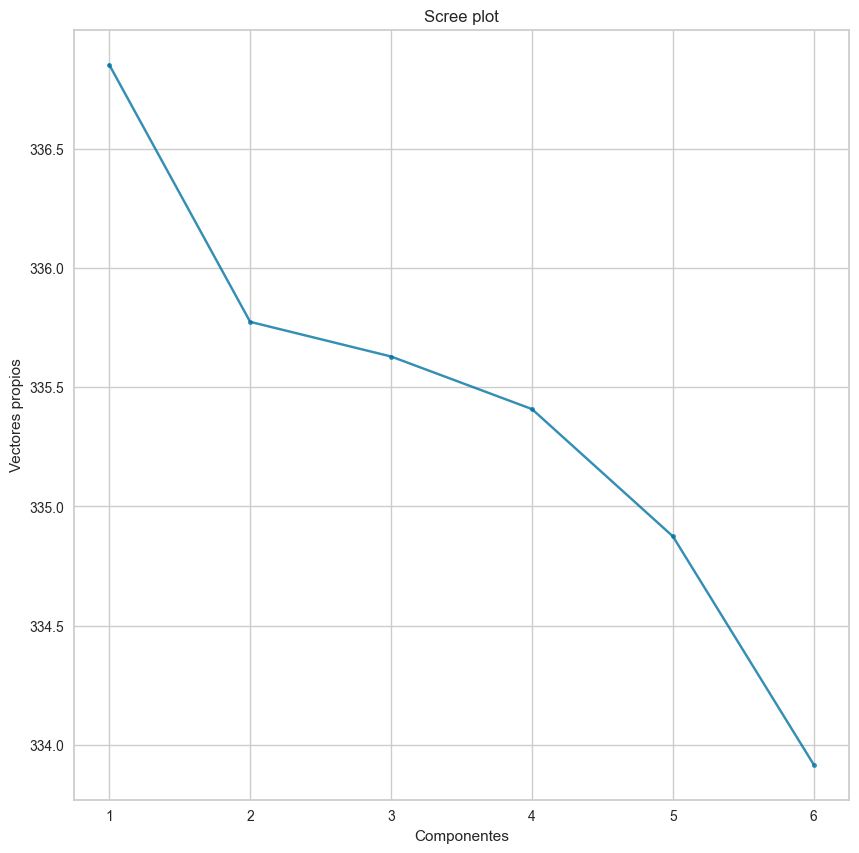

In [59]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
#La nueva base son los vectores propios de la matriz de covarianza.
y_label = plt.ylabel('Vectores propios');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

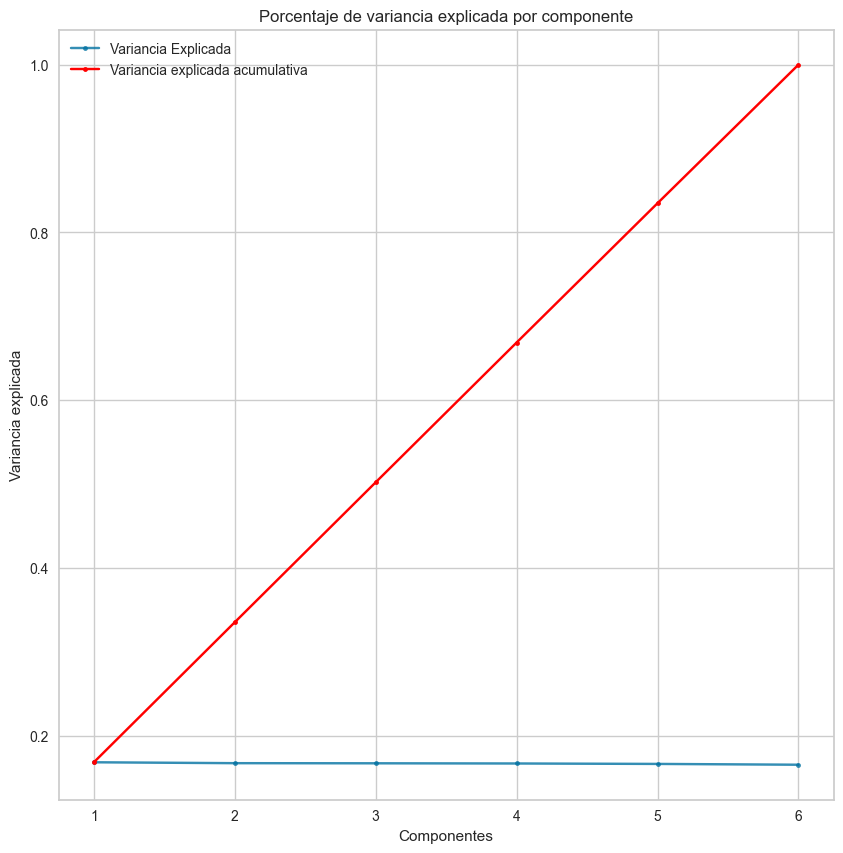

In [60]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

<AxesSubplot: >

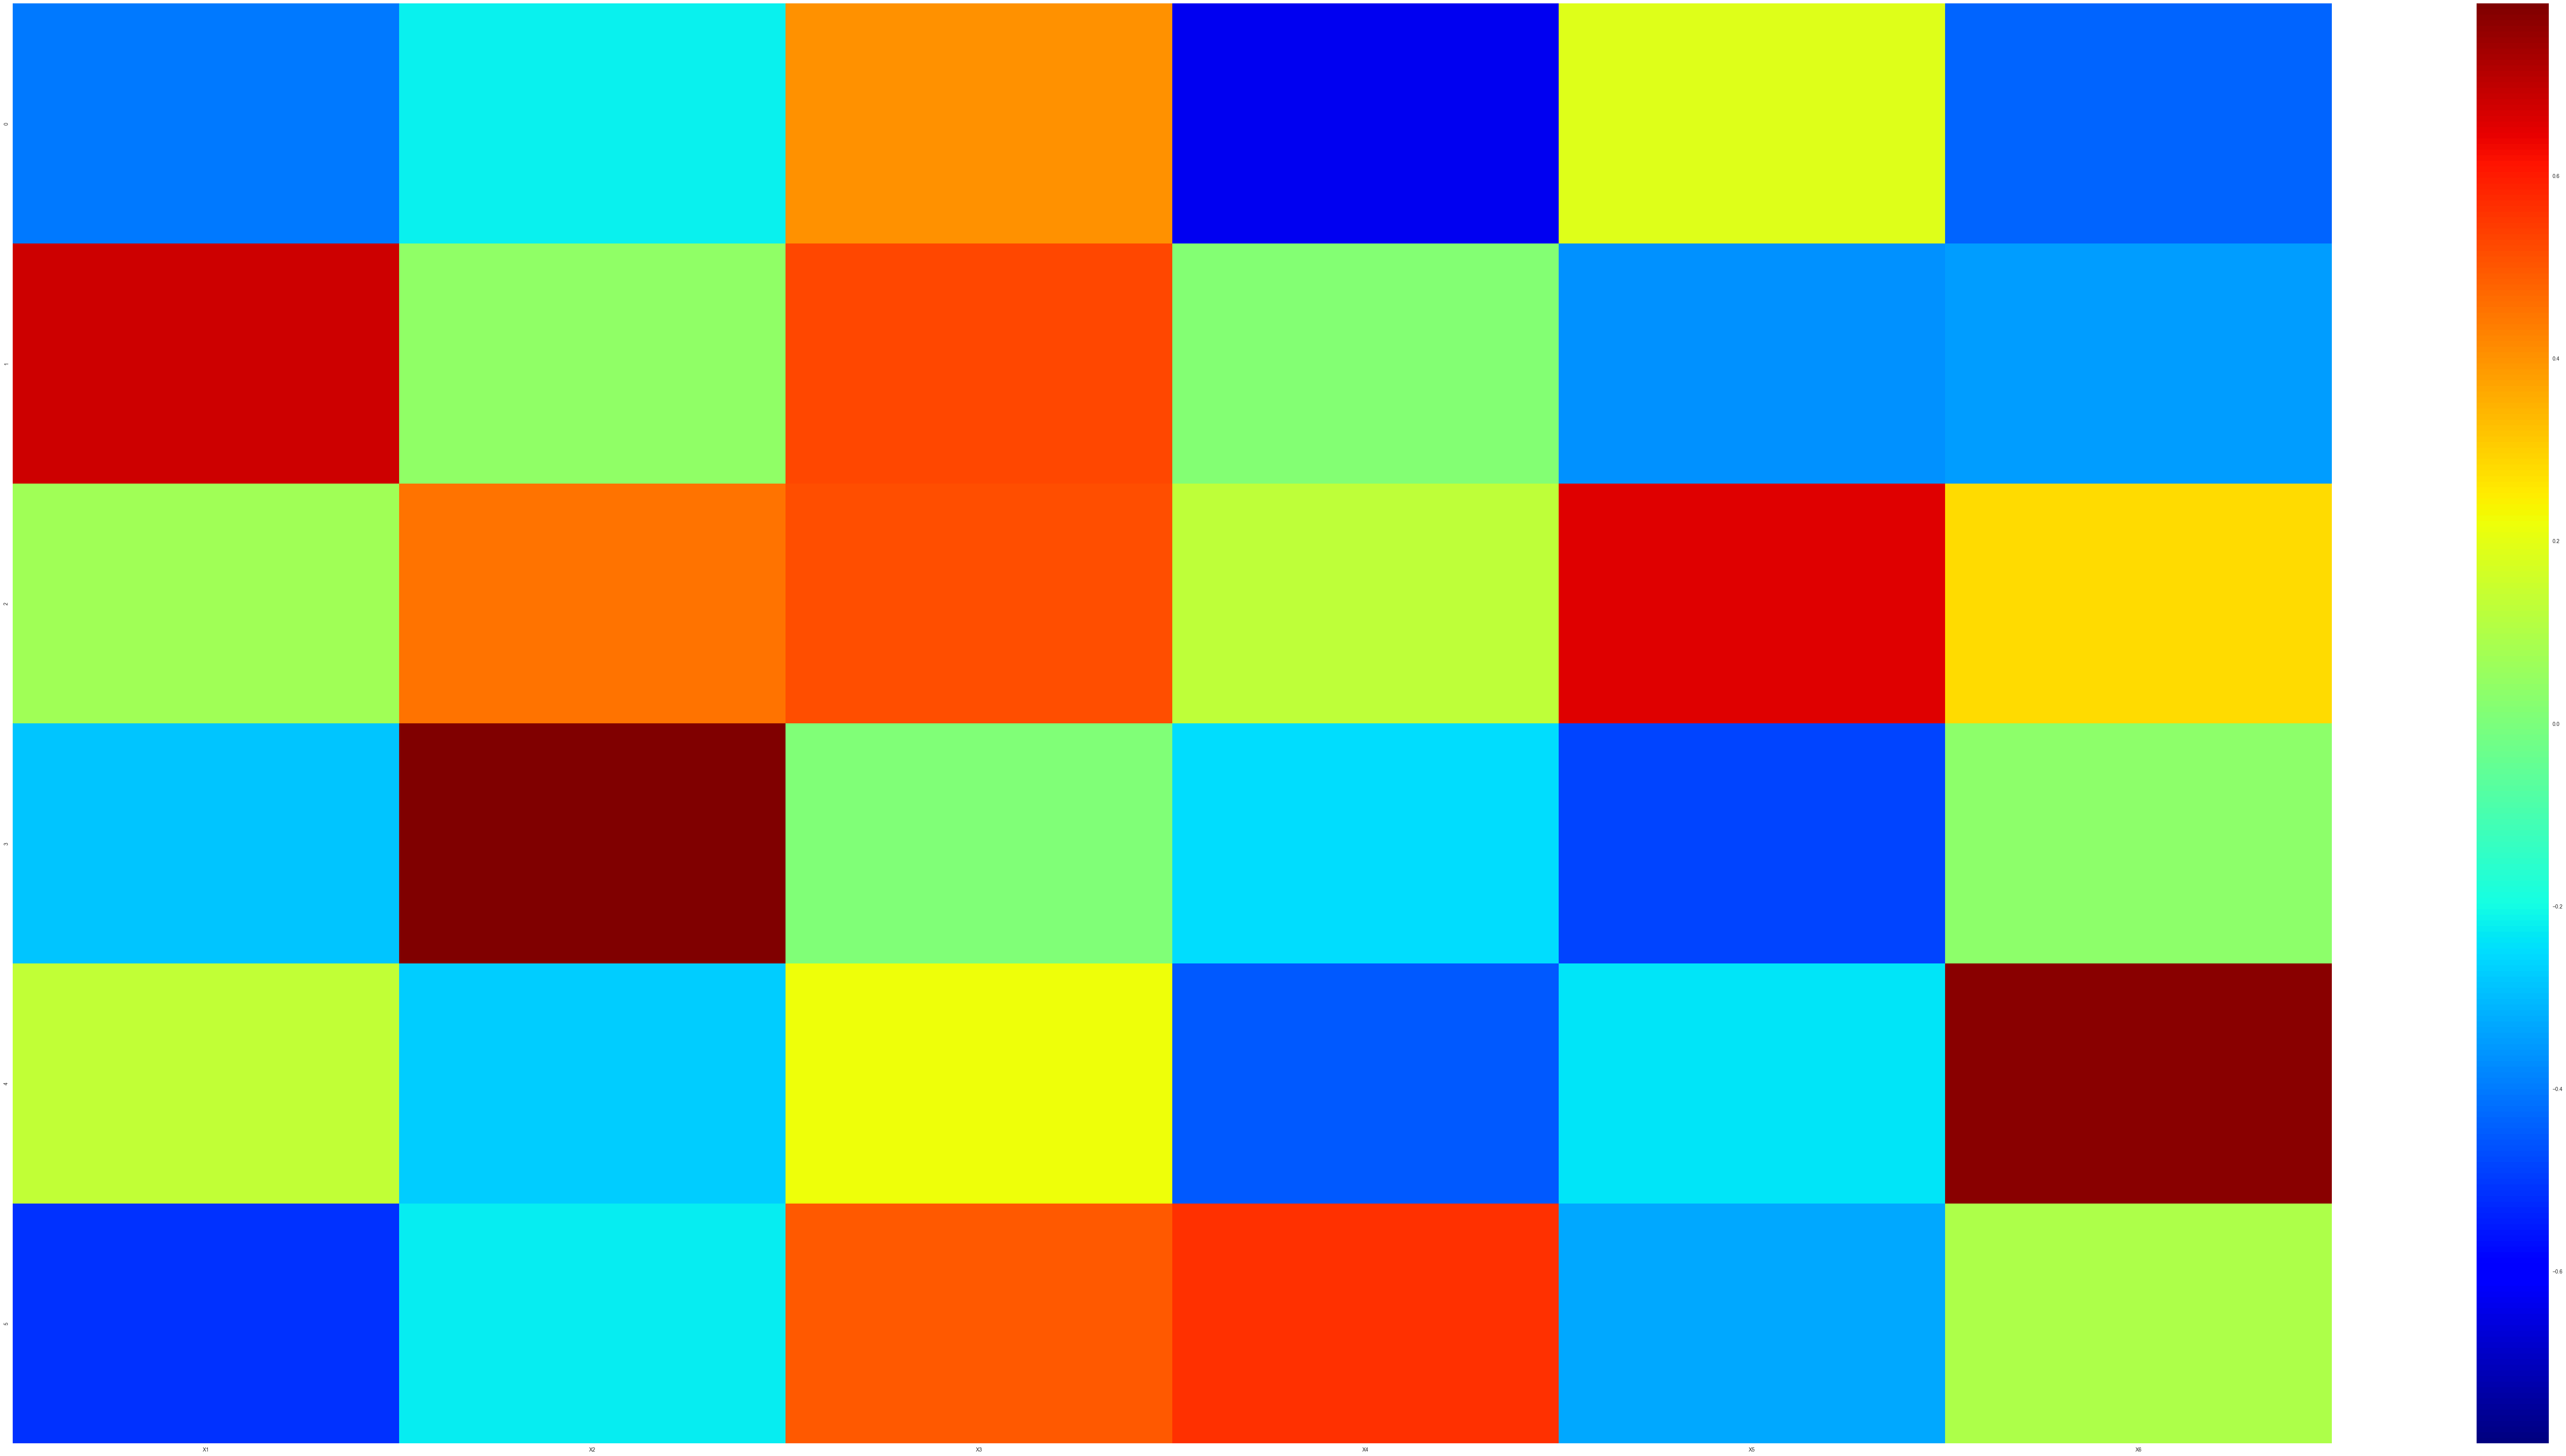

In [61]:
fig, ax = plt.subplots(figsize=(100,50))
sns.heatmap(myPCA.components_, cmap='jet', xticklabels=list(X_train_standarized[X_train_4.columns]), vmin=-np.max(np.abs(myPCA.components_)), vmax=np.max(np.abs(myPCA.components_)))

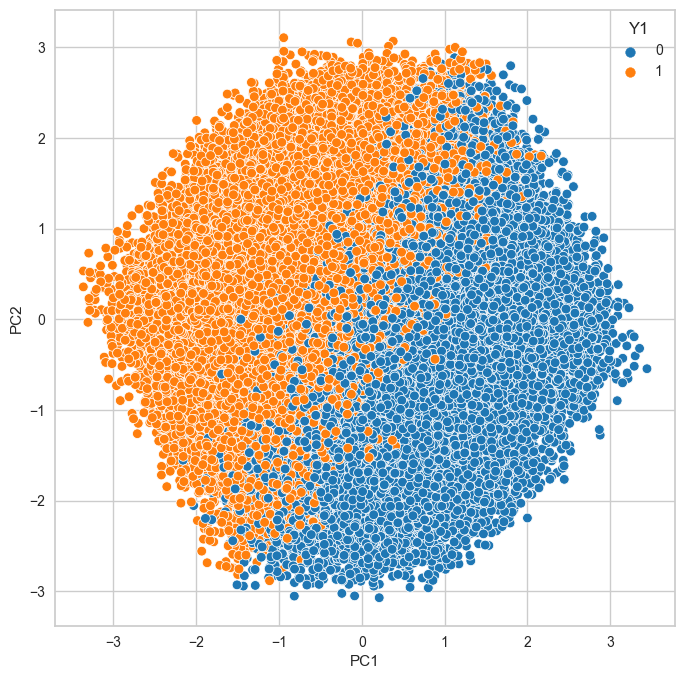

In [62]:
transformed_train = myPCA.transform(X_train_standarized[X_train_4.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train_4['Y1'], palette='tab10')

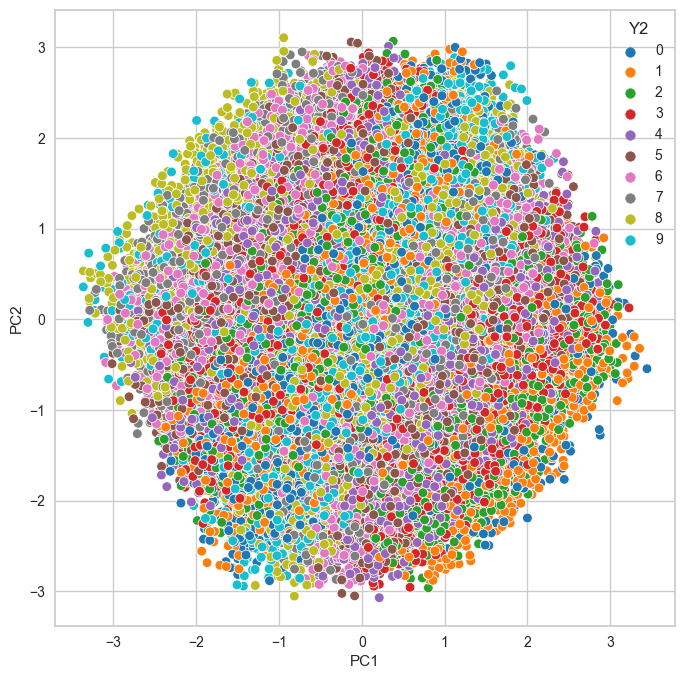

In [63]:
transformed_train = myPCA.transform(X_train_standarized[X_train_4.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train_4['Y2'], palette='tab10')

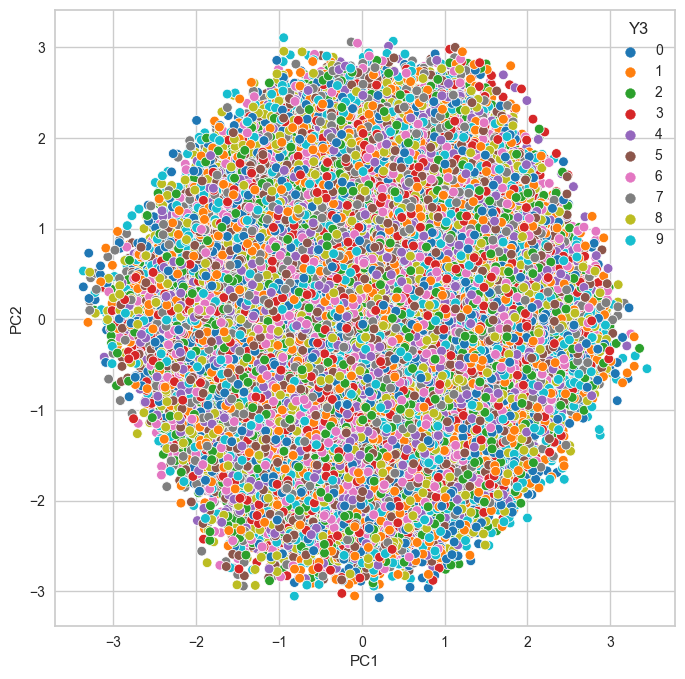

In [64]:
transformed_train = myPCA.transform(X_train_standarized[X_train_4.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train_4['Y3'], palette='tab10')

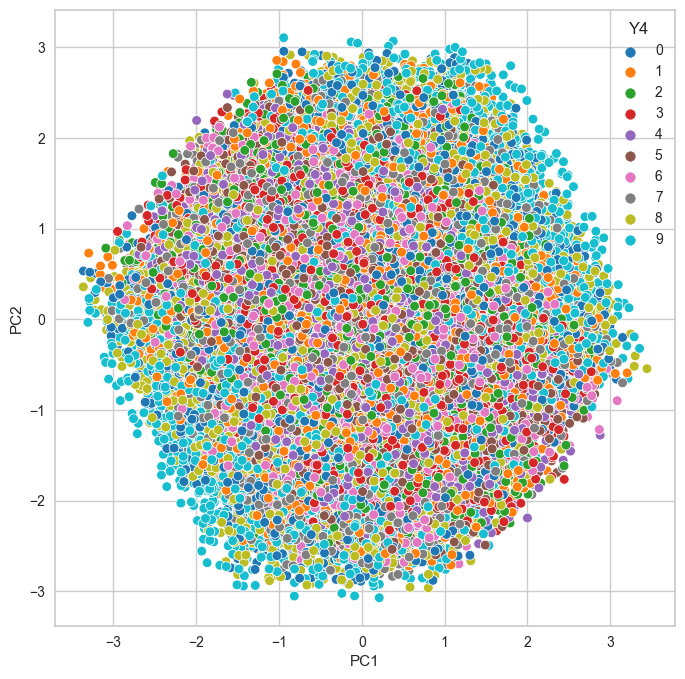

In [65]:
transformed_train = myPCA.transform(X_train_standarized[X_train_4.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train_4['Y4'], palette='tab10')

#### d) Para poder trabajar con la clasificación de salida múltiple, debéis usar el objeto $\texttt{MultiOutputClassifier}$de $\texttt{scikit learn}$. Esto envolverá el modelo clasificador k-vecinos más cercanos para que pueda realizar este tipo de clasificación. 

#### Tenéis básicamente tres hiperparámetros que podéis explorar. El número de vecinos (no tiene que ser exhaustivo, pero aseguraos de probar diferentes posibilidades y no seáis tímidos con el número de vecinos), la distancia utilizada para calcular los vecinos (encontraréis diferentes distancias disponibles en la documentación de K-nn) y si se utiliza la distancia para promediar las decisiones de los vecinos. Ajustad estos hiperparámetros para encontrar el clasificador K-nn con el mejor rendimiento para cada conjunto de datos.

#### Llevará demasiado tiempo realizar la validación cruzada, así que ajustad los parámetros utilizando la puntuación obtenida por el conjunto de test. Utilizad también el parámetro $\texttt{n_jobs=-1}$ para la clasificación K-nn y multisalida, de modo que pueda aprovechar el cálculo multinúcleo4. 

#### Explicad las cosas que habéis intentado y los resultados, no deis solo los mejores resultados. Tratad de dar una explicación sobre por qué algunas opciones tienen un mejor rendimiento que otras.

In [66]:
dataset0_oh = pd.get_dummies(dataset0, columns=data_columns, drop_first=False)
dataset1_oh = pd.get_dummies(dataset1, columns=data_columns, drop_first=False)
dataset2_oh = pd.get_dummies(dataset2, columns=data_columns, drop_first=False)
dataset3_oh = pd.get_dummies(dataset3, columns=data_columns, drop_first=False)
dataset4_oh = pd.get_dummies(dataset4, columns=data_columns, drop_first=False)
dataset5_oh = pd.get_dummies(dataset5, columns=data_columns, drop_first=False)
dataset6_oh = pd.get_dummies(dataset6, columns=data_columns, drop_first=False)
dataset7_oh = pd.get_dummies(dataset7, columns=data_columns, drop_first=False)

In [67]:
X_train_0_oh, X_test_0_oh = train_test_split(dataset0_oh, test_size=0.1, random_state=42, shuffle=True)
X_train_1_oh, X_test_1_oh = train_test_split(dataset1_oh, test_size=0.1, random_state=42, shuffle=True)
X_train_2_oh, X_test_2_oh = train_test_split(dataset2_oh, test_size=0.1, random_state=42, shuffle=True)
X_train_3_oh, X_test_3_oh = train_test_split(dataset3_oh, test_size=0.1, random_state=42, shuffle=True)
X_train_4_oh, X_test_4_oh = train_test_split(dataset4_oh, test_size=0.1, random_state=42, shuffle=True)
X_train_5_oh, X_test_5_oh = train_test_split(dataset5_oh, test_size=0.1, random_state=42, shuffle=True)
X_train_6_oh, X_test_6_oh = train_test_split(dataset6_oh, test_size=0.1, random_state=42, shuffle=True)
X_train_7_oh, X_test_7_oh = train_test_split(dataset7_oh, test_size=0.1, random_state=42, shuffle=True)

y_columns = X_train_0_oh.columns[0:4]

list(y_columns)

y_train_0_oh = X_train_0_oh[y_columns]
X_train_0_oh = X_train_0_oh.drop(y_columns, axis=1)
y_test_0_oh = X_test_0_oh[y_columns]
X_test_0_oh = X_test_0_oh.drop(y_columns, axis=1)

y_train_1_oh = X_train_1_oh[y_columns]
X_train_1_oh = X_train_1_oh.drop(y_columns, axis=1)
y_test_1_oh = X_test_1_oh[y_columns]
X_test_1_oh = X_test_1_oh.drop(y_columns, axis=1)

y_train_2_oh = X_train_2_oh[y_columns]
X_train_2_oh = X_train_2_oh.drop(y_columns, axis=1)
y_test_2_oh = X_test_2_oh[y_columns]
X_test_2_oh = X_test_2_oh.drop(y_columns, axis=1)

y_train_3_oh = X_train_3_oh[y_columns]
X_train_3_oh = X_train_3_oh.drop(y_columns, axis=1)
y_test_3_oh = X_test_3_oh[y_columns]
X_test_3_oh = X_test_3_oh.drop(y_columns, axis=1)

y_train_4_oh = X_train_4_oh[y_columns]
X_train_4_oh = X_train_4_oh.drop(y_columns, axis=1)
y_test_4_oh = X_test_4_oh[y_columns]
X_test_4_oh = X_test_4_oh.drop(y_columns, axis=1)

y_train_5_oh = X_train_5_oh[y_columns]
X_train_5_oh = X_train_5_oh.drop(y_columns, axis=1)
y_test_5_oh = X_test_5_oh[y_columns]
X_test_5_oh = X_test_5_oh.drop(y_columns, axis=1)

y_train_6_oh = X_train_6_oh[y_columns]
X_train_6_oh = X_train_6_oh.drop(y_columns, axis=1)
y_test_6_oh = X_test_6_oh[y_columns]
X_test_6_oh = X_test_6_oh.drop(y_columns, axis=1)

y_train_7_oh = X_train_7_oh[y_columns]
X_train_7_oh = X_train_7_oh.drop(y_columns, axis=1)
y_test_7_oh = X_test_7_oh[y_columns]
X_test_7_oh = X_test_7_oh.drop(y_columns, axis=1)

In [69]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#print(sklearn.neighbors.VALID_METRICS['brute'])
def knnMultioutput(x_train, y_train,x_test, y_test):
    n_neighbors = [1,2,50,100,1000]
    weights = ['distance','uniform']
    metrics = ['l2','l1','euclidean', 'manhattan', 'cosine']

    resultats = list(range(len(weights)))
    for i, w in enumerate(weights):
        res_w = list(range(len(metrics)))
        for j, m in enumerate(metrics):
            res_m = list(range(len(n_neighbors)))
            for k, n in enumerate(n_neighbors):

                knn = MultiOutputClassifier(KNeighborsClassifier(weights=w,metric=m,n_neighbors=n,n_jobs=-1),n_jobs=-1)
                knn.fit(x_train,y_train)
                score_knn_tunned = knn.score(x_test,y_test)

                res_m[k] = score_knn_tunned
                # print(n)
            res_w[j] = res_m
            # print(m)
        resultats[i] = res_w
        # print(w)


    w0, w1 = resultats[0], resultats[1]

    x = np.arange(1,len(n_neighbors)+1,1)
    veins = list(map(str,n_neighbors))

    for i, m in enumerate(metrics):
        plt.title("Dataset 0 con la métrica "+m)

        plt.xticks(x, veins)
        plt.xlabel('Nb vecinos')
        plt.ylabel('Calidad')

        plt.plot(x, w0[i], color='red')
        plt.plot(x, w1[i], color='green')
        plt.legend(["Distance", "Uniform"])
        plt.show()


In [70]:
knnMultioutput(X_train_0_oh, y_train_0_oh, X_test_0_oh, y_test_0_oh)
# knnMultioutput(X_train_1_oh, y_train_1_oh, X_test_1_oh, y_test_1_oh)
# knnMultioutput(X_train_2_oh, y_train_2_oh, X_test_2_oh, y_test_2_oh)
# knnMultioutput(X_train_3_oh, y_train_3_oh, X_test_3_oh, y_test_3_oh)
# knnMultioutput(X_train_4_oh, y_train_4_oh, X_test_4_oh, y_test_4_oh)
# knnMultioutput(X_train_5_oh, y_train_5_oh, X_test_5_oh, y_test_5_oh)
# knnMultioutput(X_train_6_oh, y_train_6_oh, X_test_6_oh, y_test_6_oh)
# knnMultioutput(X_train_7_oh, y_train_7_oh, X_test_7_oh, y_test_7_oh)



KeyboardInterrupt





#### e) A veces usar una representación diferente para los atributos facilita la tarea de aprendizaje. Dado que en realidad tenemos atributos categóricos que corresponden a los dígitos de los números, podemos codificarlos utilizando una codificación one hot. Transformad los atributos del conjunto de datos y calculad la precisión de los mejores hiperparámetros para cada conjunto de datos y comparad su precisión con los resultados anteriores. Representad la precisión del mejor clasificador para cada representación y tamaño de conjunto de datos. Comentad los resultados e intentad explicar lo que ha sucedido.

In [ ]:
n_neighbors_hot = [1,2]#5,10]#,20,30,50,70,100,200
weights = ['distance','uniform']
metrics = ['l2','l1']

resultats_hot = list(range(len(weights)))
for i, w in enumerate(weights):
    print("hola")
    res_w_hot = list(range(len(metrics)))
    for j, m in enumerate(metrics):
        res_m_hot = list(range(len(n_neighbors_hot)))
        for k, n in enumerate(n_neighbors_hot):
            knn_hot = MultiOutputClassifier(KNeighborsClassifier(weights=w,metric=m,n_neighbors=n,n_jobs=-1),n_jobs=-1)
            knn_hot.fit(X_train_0_oh,y_train_0_oh)
            print("he sorttit 2")
            score_knn_tunned_hot = knn_hot.score(X_test_0_oh,y_test_0_oh)
            print("he sorttit 3")
            res_m_hot[k] = score_knn_tunned_hot   
        res_w_hot[j] = res_m_hot
    resultats_hot[i] = res_w_hot

w0, w1 = resultats_hot[0], resultats_hot[1]

x = np.arange(1,len(n_neighbors_hot)+1,1)
veins = list(map(str, n_neighbors_hot))

for i, m in enumerate(metrics):
    plt.title("Dataset 0 con la métrica "+m)
    
    plt.xticks(x, veins)
    plt.xlabel('Nb vecinos')
    plt.ylabel('Calidad')
    
    plt.plot(x, w0[i], color='red')
    plt.plot(x, w1[i], color='green')
    plt.legend(["Distance", "Uniform"])
    plt.show()

#### f) ¿Por qué creéis que esta tarea es difícil de aprender? ¿Sería más fácil si en lugar de resolverlo como un problema de clasificación de múltiples salidas usamos la suma como la clase para predecir?